This notebook incorporates code from "ijmbarr/panama-paper-network" at 
https://github.com/ijmbarr/panama-paper-network/blob/master/panama_network.ipynb

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import random

%matplotlib inline
import matplotlib as mpl
mpl.style.use("ggplot")
import matplotlib.colors as colors
import matplotlib.cm as cmx

import os
from operator import itemgetter

In [2]:
addresses = pd.read_csv("https://cs259c8bbcd0960x47fcxbe6.blob.core.windows.net/ppdata/Addresses.csv", low_memory=False)

companies = pd.read_csv("https://cs259c8bbcd0960x47fcxbe6.blob.core.windows.net/ppdata/Entities.csv", low_memory=False)

officers = pd.read_csv("https://cs259c8bbcd0960x47fcxbe6.blob.core.windows.net/ppdata/Officers.csv", low_memory=False)

inter = pd.read_csv("https://cs259c8bbcd0960x47fcxbe6.blob.core.windows.net/ppdata/Intermediaries.csv", low_memory=False)

edges = pd.read_csv("https://cs259c8bbcd0960x47fcxbe6.blob.core.windows.net/ppdata/all_edges.csv", low_memory=False)

In [3]:
G = nx.DiGraph()

for n,row in addresses.iterrows():
    G.add_node(row.node_id, node_type="address", details=row.to_dict())
    
for n,row in companies.iterrows():
    G.add_node(row.node_id, node_type="companies", details=row.to_dict())
    
for n,row in officers.iterrows():
    G.add_node(row.node_id, node_type="officers", details=row.to_dict()) 
    
for n,row in inter.iterrows():
    G.add_node(row.node_id, node_type="intermediaries", details=row.to_dict())

for n,row in edges.iterrows():
    G.add_edge(row.node_1, row.node_2, rel_type=row.rel_type, details={})

In [24]:
#get all connected subgraphs
subgraphs = [g for g in nx.connected_component_subgraphs(G.to_undirected())]

#sort by number of nodes in each
subgraphs = sorted(subgraphs, key=lambda x: x.number_of_nodes(), reverse=True)

print([s.number_of_nodes()for s in subgraphs[:100]])

[942172, 1599, 1295, 746, 644, 597, 561, 409, 406, 387, 378, 373, 366, 363, 357, 354, 335, 326, 319, 319, 314, 305, 288, 284, 279, 270, 268, 260, 255, 252, 235, 230, 230, 221, 219, 218, 218, 209, 206, 203, 201, 200, 200, 200, 197, 197, 196, 195, 195, 188, 184, 181, 175, 175, 175, 173, 170, 166, 163, 163, 162, 156, 156, 155, 153, 153, 152, 152, 151, 150, 143, 143, 143, 143, 142, 140, 139, 139, 139, 139, 139, 138, 138, 136, 135, 134, 134, 133, 132, 127, 126, 126, 126, 126, 124, 122, 120, 119, 119, 117]


In [45]:
#accessing node lables
def get_node_label(n):
    if n["node_type"] == "address":
        if pd.isnull(n["details"]["address"]):
            return ""
        return n["details"]["address"].replace(";", "\n")
    return n["details"]["name"]


In [46]:
node_types = [
    "address",
    "companies",
    "intermediaries",
    "officers"
]

In [47]:
def plot_graph(g, label_nodes=True, label_edges=False, figsize=(15,15)):
    
    #leveraging node attributes
    node_to_int = {k: node_types.index(k) for k in node_types}
    node_colours = [node_to_int[n[1]["node_type"]] for n in g.nodes(data=True)]
    node_labels = {k:get_node_label(v) for k,v in g.nodes(data=True)}
    
    #matplotlib setup
    cmap = plt.cm.rainbow
    cNorm  = colors.Normalize(vmin=0, vmax=len(node_to_int)+1)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
    
    plt.figure(figsize=figsize)
    
    #node positioninig for networkx draw
    pos = nx.spring_layout(g, iterations=100)
    
    #graph drawing with networkx
    nx.draw_networkx_nodes(g, pos, node_color=node_colours, cmap=cmap, vmin=0, vmax=len(node_to_int)+1)
    nx.draw_networkx_edges(g, pos, edgelist=g.edges(), arrows=True)
    
    if label_nodes:
        nx.draw_networkx_labels(g, pos, labels=node_labels, font_size=10, font_family='sans-serif')
        
    if label_edges:
        edge_labels = {(e[0], e[1]): e[2]["rel_type"] for e in g.edges(data=True)}
        nx.draw_networkx.edge_labels(g, pos, edge_labels)
        

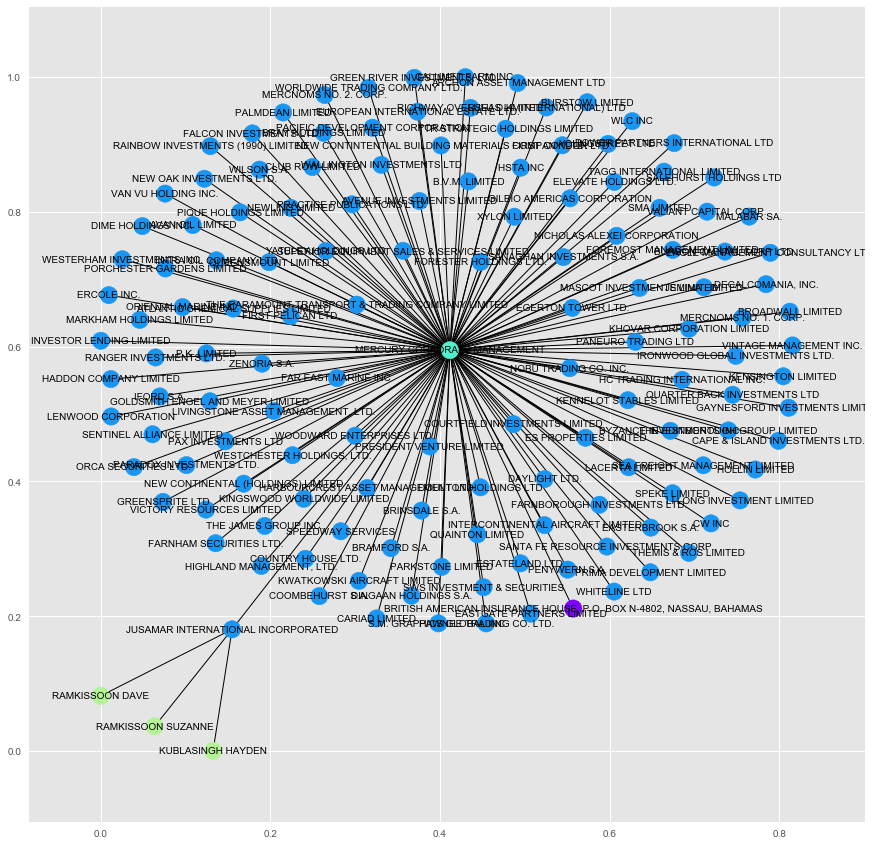

In [49]:
plot_graph(subgraphs[74], figsize=(15,15))

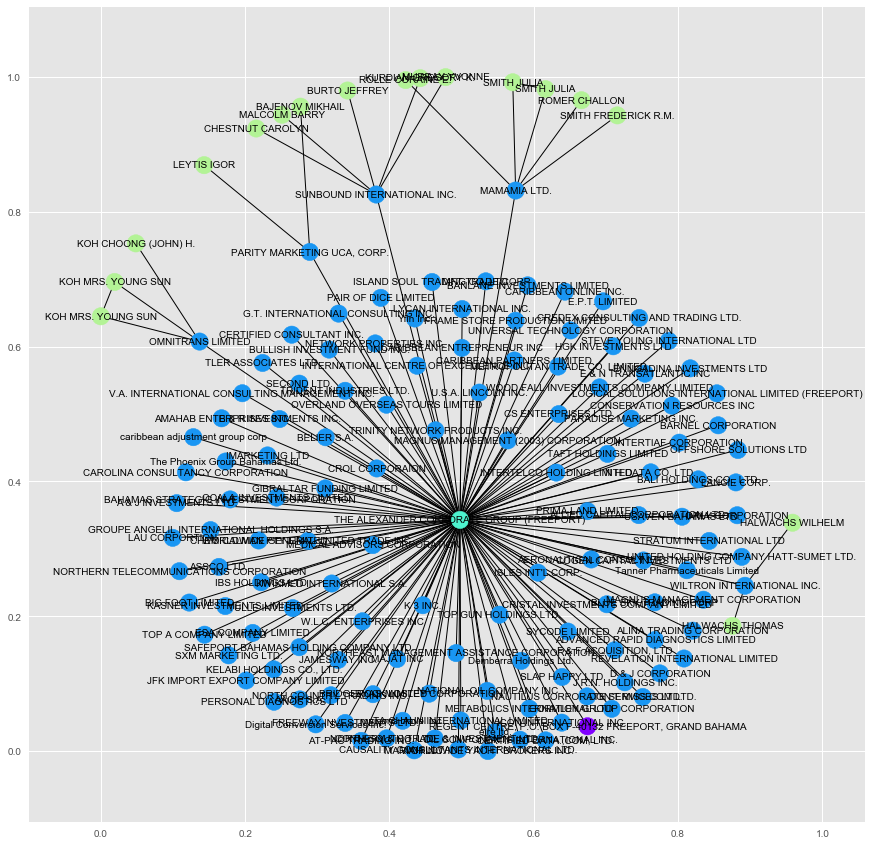

In [42]:
plot_graph(subgraphs[69], figsize=(15,15))

In [66]:
#setting up node degree exploration
nodes = g.nodes()
g_degree = g.degree()
types = [g.node[n]["node_type"] for n in nodes]
degrees = [g_degree[n] for n in nodes]
names = [get_node_label(g.node[n]) for n in nodes]
node_degree = pd.DataFrame(data={"node_type":types, "degree":degrees, "name": names}, index=nodes)

In [68]:
#sorting by node degree(number of neighbouring nodes)
node_degree.sort_values("degree", ascending=False)[0:20]

,degree,name,node_type
236724,37338,Portcullis TrustNet Chambers P.O. Box 3444 Roa...,address
54662,36256,Portcullis TrustNet (BVI) Limited,intermediaries
23000136,14902,MOSSACK FONSECA & CO. (BAHAMAS) LIMITED,intermediaries
23000147,9719,UBS TRUSTEES (BAHAMAS) LTD.,intermediaries
23000330,8302,CREDIT SUISSE TRUST LIMITED,intermediaries
23000156,8287,TRIDENT CORPORATE SERVICES (BAH) LTD,intermediaries
23000133,8150,MMG BAHAMAS LTD.,intermediaries
11001746,7016,ORION HOUSE SERVICES (HK) LIMITED,intermediaries
298333,5700,Unitrust Corporate Services Ltd.,intermediaries
288469,5699,Unitrust Corporate Services Ltd. John Humphrie...,address


In [84]:
#working with page rank
pr = nx.pagerank_scipy(g)
node_degree["page_rank"] = node_degree.index.map(lambda x: pr[x])
node_degree.sort_values("page_rank", ascending=False)[0:20]

,degree,name,node_type,page_rank
23000147,9719,UBS TRUSTEES (BAHAMAS) LTD.,intermediaries,0.008680
23000133,8150,MMG BAHAMAS LTD.,intermediaries,0.007152
236724,37338,Portcullis TrustNet Chambers P.O. Box 3444 Roa...,address,0.007095
54662,36256,Portcullis TrustNet (BVI) Limited,intermediaries,0.006703
23000136,14902,MOSSACK FONSECA & CO. (BAHAMAS) LIMITED,intermediaries,0.006702
23000156,8287,TRIDENT CORPORATE SERVICES (BAH) LTD,intermediaries,0.006250
23000213,5319,K.M.C. CORPORATE SERVICES LTD.,intermediaries,0.004782
23000330,8302,CREDIT SUISSE TRUST LIMITED,intermediaries,0.004667
23000046,5015,** DISABLED SUISSE SECURITY BANK & TRUST,intermediaries,0.004522
23000280,4996,PRIVATE TRUST CORPORATION LIMITED,intermediaries,0.004439


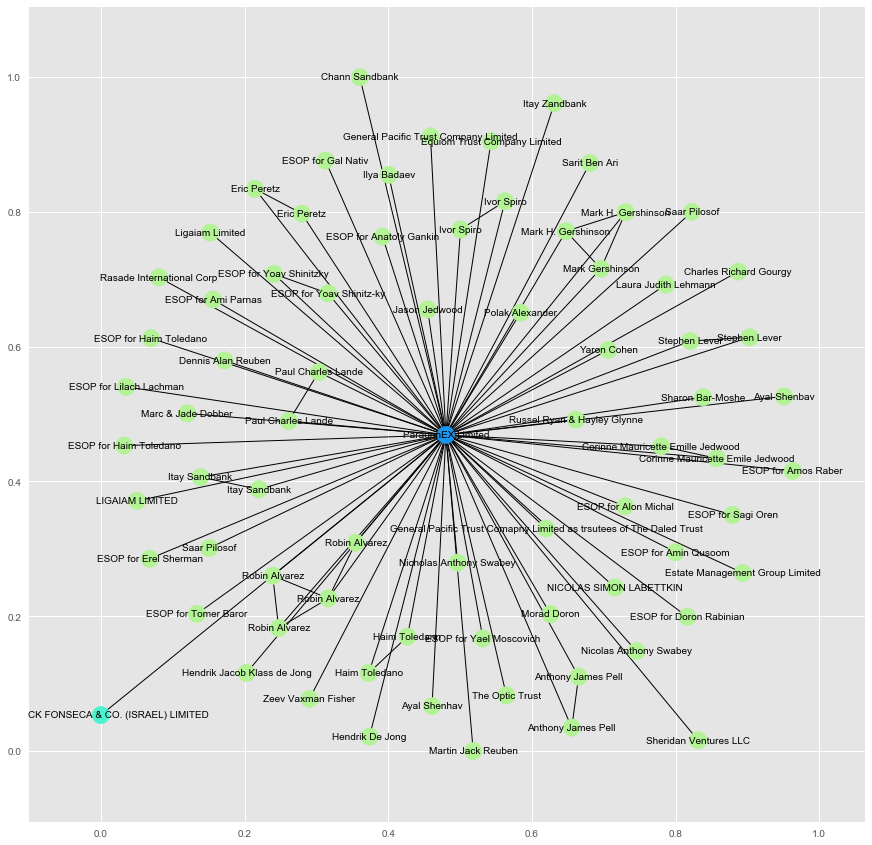

In [87]:
eg = nx.ego_graph(g, 10165699, radius=1)
plot_graph(eg)

The Graph on Map section code and ideas are borrowed from Sociology Hacks at http://www.sociology-hacks.org/?p=67 

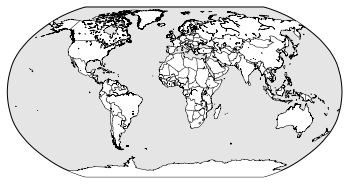

In [100]:
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='robin',lon_0=0,resolution='l')
m.drawcountries(linewidth = 0.5)
m.fillcontinents(color='white',lake_color='white')
m.drawcoastlines(linewidth=0.5)
plt.figure(figsize=(15,15))


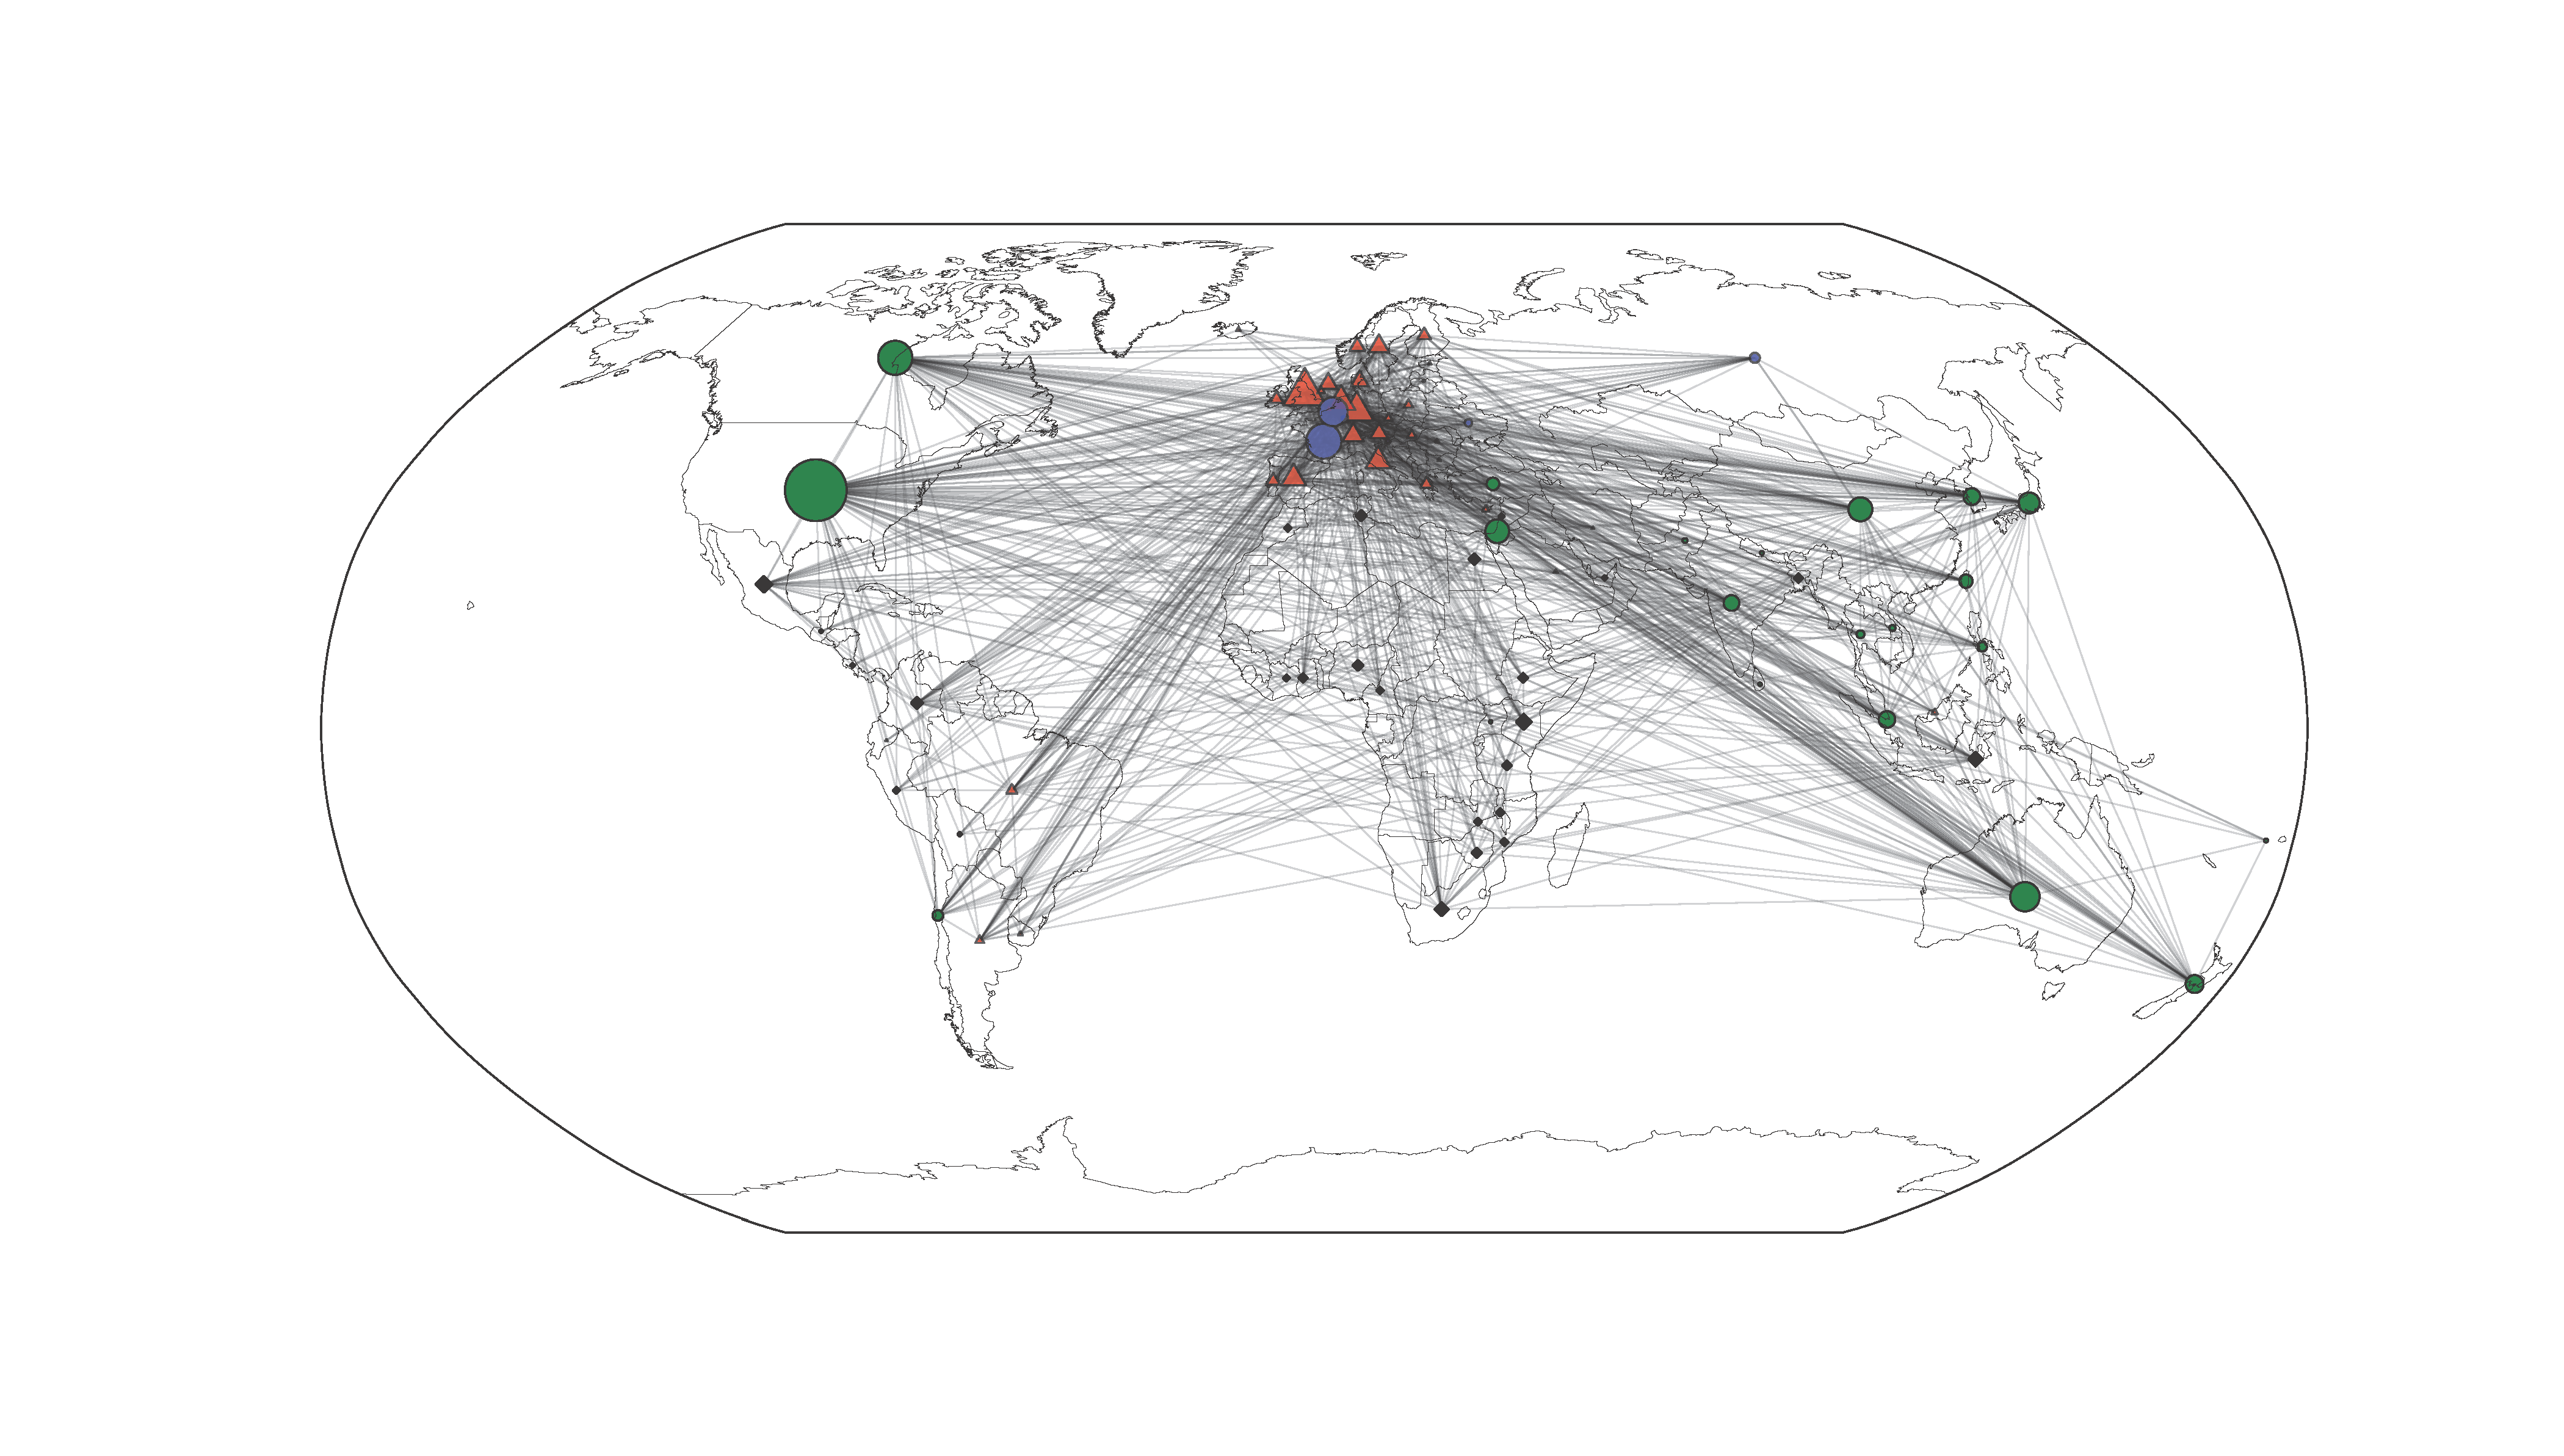

In [104]:
from IPython.display import Image
Image("https://cs259c8bbcd0960x47fcxbe6.blob.core.windows.net/ppdata/Graph%20on%20Map.png")